# *Natural Language Processing Assignment*

##### <font color="teal">**1. Basic preprocessing**</font>






###### <font color="teal">**1.1 Open the database. Generate simple statistics about the abstracts. How many unique articles are there? What is the mean length of abstracts in characters?**</font>

In [1]:
import pandas as pd

data = pd.read_csv("PLOS_narrativity.csv")

unique_articles = data['pmid'].nunique()

mean_abstract_length = data['ab'].dropna().apply(len).mean()

print(f"Unique articles: {unique_articles}")
print(f"Mean length of abstracts: {mean_abstract_length:.2f} characters")


Unique articles: 802
Mean length of abstracts: 1496.18 characters


##### <font color="teal">**2. Word-level preprocessing**</font>


###### <font color="teal">**2.1 Split the abstracts into list of words. How many different words are there in the vocabulary?**</font>



In [3]:
all_abstracts = ' '.join(data['ab'].dropna())

words = set(all_abstracts.lower().split(sep=' '))

unique_word_count = len(words)

print(f"Unique words in abstracts: {unique_word_count}")


Unique words in abstracts: 19383


###### <font color="teal">**2.2 Split the abstracts into list of words using three different tokenizers from nltk. What is the difference in terms of number of words? What do you think has changed?**</font>



In [4]:
import nltk
from nltk.tokenize import TreebankWordTokenizer, ToktokTokenizer, TweetTokenizer

In [5]:
all_abstracts = ' '.join(data['ab'].dropna())

treebank_tokenizer = TreebankWordTokenizer()
toktok_tokenizer = ToktokTokenizer()
tweet_tokenizer = TweetTokenizer()

treebank_tokens = treebank_tokenizer.tokenize(all_abstracts)
toktok_tokens = toktok_tokenizer.tokenize(all_abstracts)
tweet_tokens = tweet_tokenizer.tokenize(all_abstracts)

treebank_unique_words = set(treebank_tokens)
toktok_unique_words = set(toktok_tokens)
tweet_unique_words = set(tweet_tokens)

print(f"Treebank Tokenizer: {len(treebank_unique_words)} unique words")
print(f"Toktok Tokenizer: {len(toktok_unique_words)} unique words")
print(f"Tweet Tokenizer: {len(tweet_unique_words)} unique words")


Treebank Tokenizer: 16576 unique words
Toktok Tokenizer: 16594 unique words
Tweet Tokenizer: 14432 unique words


Well, for the split word by space, we got 19383. 
Treebank got 16576, Toktok got 16594, and Tweet got 14432.

TreebankWordTokenizer:
Style: Based on the Penn Treebank tokenization.
Characteristics: Handles punctuation like periods and commas separately; splits contractions (e.g., "can't" -> "ca n't").

ToktokTokenizer:
Style: A general-purpose tokenizer.
Characteristics: Maintains a balance between splitting and grouping; respects some punctuation.

TweetTokenizer:
Style: Designed for social media text.
Characteristics: Keeps hashtags, mentions, and emoticons intact; better for informal language.

The different between the number of the words is depends on how they handle words and punctuation, contractions, and special symbols.
 


In [6]:
# print random sample of all tokenizer
import random

words_list = list(words)
treebank_unique_words_list = list(treebank_unique_words)
toktok_unique_words_list = list(toktok_unique_words)
tweet_unique_words_list = list(tweet_unique_words)

for i in range(20):
    # print(words_list[random.randint(0, len(words_list) - 1)])
    # print(treebank_unique_words_list[random.randint(0, len(treebank_unique_words_list) - 1)])
    print(toktok_unique_words_list[random.randint(0, len(toktok_unique_words_list) - 1)])
    # print(tweet_unique_words_list[random.randint(0, len(tweet_unique_words_list) - 1)])

pocket
samples
portions
specifics
7.8
impossible.
elect
Multidecadal
make
permitting
costs.
rates-canopy
requirements
locate
loggers.
2300
influenced
out
extrapolating
heliopora


##### <font color="teal">**3. Domain specificity and regex**</font>


###### <font color="teal">**3.1 Use regex to retrieve numbers (ints, floats, %, years, ...) in abstracts.**</font>


*Regex cheasheet* : see python's re module documentation https://docs.python.org/3/library/re.html  

*Other ressources* : 

- A good website to write and test regular expressions : 
https://regex101.com/
- A good game to learn regex : https://alf.nu/RegexGolf 


In [7]:
import re

pattern = r'\b\d+\.\d+|\b\d+%|\b\d{4}|\b\d+\b'
matches = re.findall(pattern, all_abstracts)
print(f"Found {len(matches)} numbers in the abstracts.")

Found 29883 numbers in the abstracts.


In [12]:
with open("test.txt", "w") as f:
    abstr = data['ab'].head(10)
    for i in range(len(abstr)):
        f.write(abstr[i])
        f.write("\n\n")

###### <font color="teal">**3.2 How many percent of characters are numbers (as defined above) in a given abstract?**</font>


In [10]:
characters = data['ab'].dropna().apply(len)

percentages = len(matches)/characters.sum() * 100
print(f"Found {percentages:.2f} percentages in the abstracts.")

Found 0.36 percentages in the abstracts.


##### <font color="teal">**4. Classic NLP pipeline**</font>


###### <font color="teal">**4.0 Re-tokenize using spacy**</font>

It is useful to take a look at spacy's [tokenizer documentation](https://spacy.io/usage/spacy-101#annotations-token)


In [2]:
print(data.columns)

Index(['Unnamed: 0', 'X_unit_id', 'X_created_at', 'X_id', 'X_started_at',
       'X_tainted', 'X_channel', 'X_trust', 'X_worker_id', 'X_country',
       'X_region', 'X_city', 'X_ip', 'appeal_to_reader', 'conjunctions',
       'connectivity', 'narrative_perspective', 'sensory_language', 'setting',
       'ab', 'appeal_to_reader_gold', 'conjunctions_gold', 'connectivity_gold',
       'narrative_perspective_gold', 'pmid', 'py', 'sensory_language_gold',
       'setting_gold', 'so', 'tc', 'af', 'au', 'bp', 'di', 'ep', 'is', 'pd',
       'pt', 'sn', 'ti', 'ut', 'vl', 'z9', 'cin_mas', 'firstauthor',
       'numberauthors', 'pid_mas', 'title'],
      dtype='object')


In [3]:
import spacy
nlp = spacy.load("en_core_web_sm") #load the small model
data["doc"] = data["ab"].apply(nlp)


In [4]:
data["tokens"] = data["doc"].apply(lambda doc: [token.text for token in doc])

###### <font color="teal">**4.1 Lemmatize using spacy**</font>


In [5]:
data["lemmas"] = data["doc"].apply(lambda doc: [token.lemma_ for token in doc])


In [6]:
print(data['lemmas'].head(5))

0    [the, range, of, plant, and, animal, be, move,...
1    [the, range, of, plant, and, animal, be, move,...
2    [the, range, of, plant, and, animal, be, move,...
3    [the, range, of, plant, and, animal, be, move,...
4    [the, range, of, plant, and, animal, be, move,...
Name: lemmas, dtype: object


###### <font color="teal">**4.2 POS tagging using spacy, plot the trees**</font>

In [7]:
data["pos_tags"] = data["doc"].apply(lambda doc: [(token.text, token.pos_) for token in doc])

In [8]:
from spacy import displacy

In [9]:
import IPython
print(IPython.__version__)
from IPython.display import *
print(dir())


8.0.0
['Audio', 'Code', 'DisplayHandle', 'DisplayObject', 'FileLink', 'FileLinks', 'GeoJSON', 'HTML', 'IFrame', 'IPython', 'Image', 'In', 'JSON', 'Javascript', 'Latex', 'Markdown', 'Math', 'Out', 'Pretty', 'ProgressBar', 'SVG', 'ScribdDocument', 'TextDisplayObject', 'Video', 'VimeoVideo', 'YouTubeVideo', '_', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '__vsc_ipynb_file__', '_dh', '_i', '_i1', '_i2', '_i3', '_i4', '_i5', '_i6', '_i7', '_i8', '_i9', '_ih', '_ii', '_iii', '_oh', 'clear_output', 'data', 'displacy', 'display', 'display_html', 'display_javascript', 'display_jpeg', 'display_json', 'display_latex', 'display_markdown', 'display_pdf', 'display_png', 'display_pretty', 'display_svg', 'exit', 'get_ipython', 'mean_abstract_length', 'nlp', 'pd', 'publish_display_data', 'quit', 'set_matplotlib_close', 'set_matplotlib_formats', 'spacy', 'unique_articles', 'update_display']


In [10]:
from IPython.display import display, HTML



In [11]:
for idx, row in data.iterrows():
    # Process the abstract text using spaCy
    doc = nlp(row["ab"])
    
    # Print which abstract is being processed
    print(f"Plotting tree for abstract {idx + 1}: {row['ab']}")
    
    # Render the dependency tree in Jupyter (using displacy.render)
    displacy.serve(doc, style="dep", options={"compact": True, "color": "blue", "background": "white"})

Plotting tree for abstract 1: The ranges of plants and animals are moving in response to recent changes in climate. As temperatures rise, ecosystems with 'nowhere to go', such as mountains, are considered to be more threatened. However, species survival may depend as much on keeping pace with moving climates as the climate's ultimate persistence. Here we present a new index of the velocity of temperature change (km yr(-1)), derived from spatial gradients ( degrees C km(-1)) and multimodel ensemble forecasts of rates of temperature increase ( degrees C yr(-1)) in the twenty-first century. This index represents the instantaneous local velocity along Earth's surface needed to maintain constant temperatures, and has a global mean of 0.42 km yr(-1) (A1B emission scenario). Owing to topographic effects, the velocity of temperature change is lowest in mountainous biomes such as tropical and subtropical coniferous forests (0.08 km yr(-1)), temperate coniferous forest, and montane grasslands. V

e:\School Project\NLP\NLP-Final\.venv\Lib\site-packages\spacy\displacy\__init__.py:106: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.
Plotting tree for abstract 2: The ranges of plants and animals are moving in response to recent changes in climate. As temperatures rise, ecosystems with 'nowhere to go', such as mountains, are considered to be more threatened. However, species survival may depend as much on keeping pace with moving climates as the climate's ultimate persistence. Here we present a new index of the velocity of temperature change (km yr(-1)), derived from spatial gradients ( degrees C km(-1)) and multimodel ensemble forecasts of rates of temperature increase ( degrees C yr(-1)) in the twenty-first century. This index represents the instantaneous local velocity along Earth's surface needed to maintain constant temperatures, and has a global mean of 0.42 km yr(-1) (A1B emission scenario). Owing to topographic effects, the velocity of temperature change is lowest in mountainous biomes such as tropical and subt


Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...



: 

: 

###### <font color="teal">**4.3 NER using spacy, give the amount of each entity type for a given abstract, visualize entities**</font>

In [11]:

# Assuming `data["doc"]` contains spaCy doc objects (after applying nlp)
data["ents"] = data["doc"].apply(lambda doc: [(ent.text, ent.label_) for ent in doc.ents])

# Print the first few rows to check
print(data["ents"].head())

0    [(the twenty-first century, DATE), (Earth, LOC...
1    [(the twenty-first century, DATE), (Earth, LOC...
2    [(the twenty-first century, DATE), (Earth, LOC...
3    [(the twenty-first century, DATE), (Earth, LOC...
4    [(the twenty-first century, DATE), (Earth, LOC...
Name: ents, dtype: object


In [12]:
from collections import Counter

# Example: Count entity types for one abstract
Counter([ent.label_ for ent in data.loc[0, "doc"].ents])

Counter({'DATE': 3, 'LOC': 2, 'QUANTITY': 3, 'PERCENT': 1})

In [13]:
displacy.render(data["doc"][0], style="ent")


##### <font color="teal">**5. Topic Modelling**</font>


###### <font color="teal">**5.1 Use Gensim's LDA to compute a topic model.**</font> 


In [ ]:
import gensim
from spacy.lang.en.stop_words import STOP_WORDS
from gensim.models import LdaModel
def preprocess_text(text):
    doc = nlp(text)
    tokens = [
        token.lemma_.lower()  # always lowercase the lemma
        for token in doc
        if token.lemma_.lower() not in STOP_WORDS and not token.is_punct and not token.is_space
    ]
    return tokens
# Tokenize + remove stopwords
data['clean_tokens'] = data['ab'].dropna().apply(preprocess_text)



In [44]:
print(data['clean_tokens'].head(10))

0    range plant animal response recent change clim...
1    range plant animal response recent change clim...
2    range plant animal response recent change clim...
3    range plant animal response recent change clim...
4    range plant animal response recent change clim...
5    range plant animal response recent change clim...
6    range plant animal response recent change clim...
7    polar temperature approximately 3 5 degree c w...
8    polar temperature approximately 3 5 degree c w...
9    polar temperature approximately 3 5 degree c w...
Name: clean_tokens, dtype: object


In [45]:
from gensim import corpora
dictionary = corpora.Dictionary(data['clean_tokens'])
corpus = [dictionary.doc2bow(text) for text in data['cleaned_tokens']]

TypeError: doc2bow expects an array of unicode tokens on input, not a single string

In [30]:
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=15)

In [31]:
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.046*"the" + 0.036*"," + 0.035*"of" + 0.031*"." + 0.024*"and"')
(1, '0.038*"," + 0.033*"." + 0.029*"and" + 0.028*"in" + 0.028*"of"')
(2, '0.043*"the" + 0.043*"," + 0.040*"of" + 0.036*"and" + 0.034*"."')
(3, '0.050*"the" + 0.035*"of" + 0.033*"," + 0.033*"." + 0.027*"in"')
(4, '0.040*"," + 0.036*"of" + 0.035*"and" + 0.035*"the" + 0.034*"."')


###### <font color="teal">**5.2 Use PyLDAvis to visualise the topic model. What are the different topic clusters?**</font>


In [32]:
import pyLDAvis.gensim_models
import pyLDAvis

# Prepare visualization
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.097222 -0.045116       1        1  22.209180
3      0.099414 -0.004723       2        1  22.081699
2     -0.051474 -0.017327       3        1  20.715530
1      0.057255 -0.065508       4        1  18.579304
0     -0.007974  0.132673       5        1  16.414287, topic_info=           Term          Freq         Total Category  logprob  loglift
135     species   8027.000000   8027.000000  Default  30.0000  30.0000
58    emissions   1972.000000   1972.000000  Default  29.0000  29.0000
4             )  16080.000000  16080.000000  Default  28.0000  28.0000
1055      coral   1371.000000   1371.000000  Default  27.0000  27.0000
67       forest   1406.000000   1406.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
158        with   1454.591372   8386.887885   Topic5  -5.0700   0.0551
41       change   1342.406535   7275.760732   Topic5  -5.1503   0.1169
37           be   1095.862476   4669.606192   Topic5  -5.3532   0.3575
26          The   1053.719575   5653.938099   Topic5  -5.3924   0.1270
36           as    855.234123   5504.144381   Topic5  -5.6011  -0.0549

[428 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
0         1  0.044351      %
0         2  0.075293      %
0         3  0.197686      %
0         4  0.416001      %
0         5  0.266791      %
...     ...       ...    ...
159       1  0.042572  years
159       2  0.602565  years
159       3  0.076256  years
159       4  0.214734  years
159       5  0.063625  years

[747 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 3, 2, 1])

###### <font color="teal">**5.3 Use a tf-idf representation for each abstract, and use your favorite clustering algorithm.**</font>


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


In [35]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(data['ab'].dropna())



In [36]:
k = 7
kmeans = KMeans(n_clusters=k, random_state=42)
data['cluster'] = kmeans.fit_predict(X_tfidf)

In [37]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf.toarray())


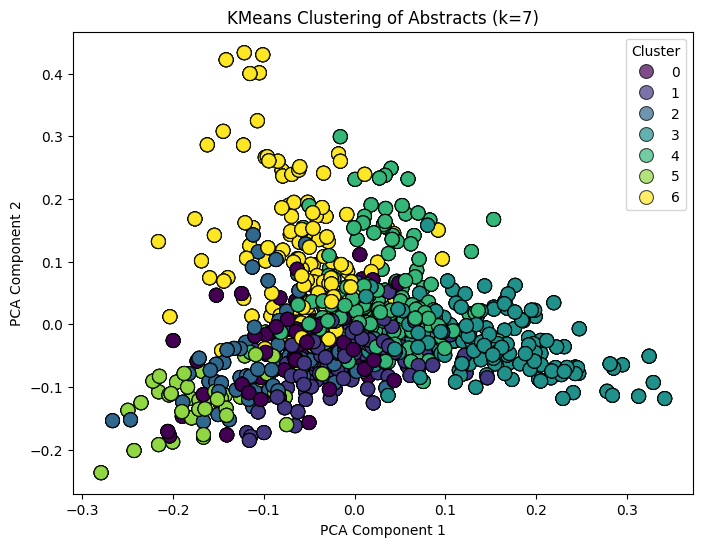

In [39]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['cluster'], palette='viridis', s=100, alpha=0.7, edgecolor='black')
plt.title(f"KMeans Clustering of Abstracts (k={k})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()